<h1 align='center' style='color:purple'>Credit Card Imbalanced Data Set</h1>

Credit Card Fraud Dataset, trying different algorithms, also try to run 2 consecutive tests to see if this can improve the model
Author: Donald Stierman

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling as pp
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

In [2]:
# Load the Data Set

df = pd.read_csv('creditcard.csv')

In [3]:
# Check the data
print(df.head())

   Time_Series        V1        V2        V3        V4        V5        V6  \
0          0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount 

In [4]:
# Check the datatypes of the Data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time_Series    284807 non-null float64
V1             284807 non-null float64
V2             284807 non-null float64
V3             284807 non-null float64
V4             284807 non-null float64
V5             284807 non-null float64
V6             284807 non-null float64
V7             284807 non-null float64
V8             284807 non-null float64
V9             284807 non-null float64
V10            284807 non-null float64
V11            284807 non-null float64
V12            284807 non-null float64
V13            284807 non-null float64
V14            284807 non-null float64
V15            284807 non-null float64
V16            284807 non-null float64
V17            284807 non-null float64
V18            284807 non-null float64
V19            284807 non-null float64
V20            284807 non-null float64
V21            284807 non-null float64
V22            284807 non-null 

In [5]:
# Check the Uniqueness
df.nunique()

Time_Series    124592
V1             275663
V2             275662
V3             275663
V4             275662
V5             275662
V6             275662
V7             275662
V8             275661
V9             275662
V10            275659
V11            275662
V12            275662
V13            275663
V14            275662
V15            275661
V16            275661
V17            275662
V18            275662
V19            275661
V20            275661
V21            275660
V22            275661
V23            275659
V24            275662
V25            275661
V26            275661
V27            275659
V28            275653
Amount          32767
Class               2
dtype: int64

In [6]:
# Check for missing data
df.isnull().sum()

Time_Series    0
V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19            0
V20            0
V21            0
V22            0
V23            0
V24            0
V25            0
V26            0
V27            0
V28            0
Amount         0
Class          0
dtype: int64

In [7]:
# Check the Statistics

df.describe(include ='all')

,Time_Series,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,-2.971792e-14,2.531226e-14,-1.923049e-14,1.093810e-14,-6.677660e-14,1.285053e-14,-5.204238e-14,1.023695e-14,2.237256e-15,...,-3.823399e-14,9.996013e-14,8.036320e-15,3.042869e-14,-8.644179e-14,-9.235807e-14,-5.269689e-14,9.542474e-14,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781942e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Check the Class Imbalance of the Data 

df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

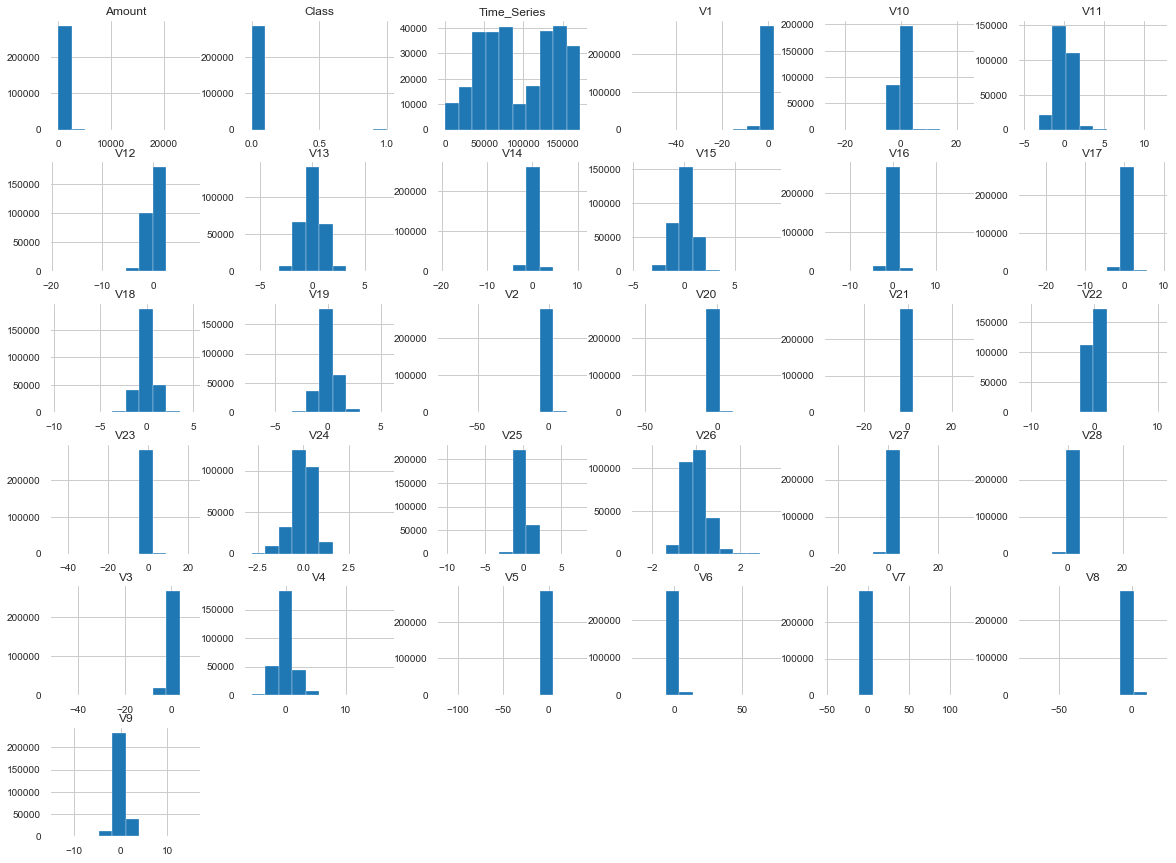

In [9]:
# Histograms of the features

df.hist(bins=10, figsize=(20,15))
plt.show()

In [10]:
# divide full data into features and label

X = df.loc[:, df.columns != 'Class']
y = df.loc[:, df.columns == 'Class']

In [11]:
# Split the Data into Train and Test 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [12]:
# find the number of minority (value=1) samples in our train set so we can down-sample our majority to it
yes = len(y_train[y_train['Class'] ==1])

# retrieve the indices of the minority and majority samples 
yes_ind = y_train[y_train['Class'] == 1].index
no_ind = y_train[y_train['Class'] == 0].index

# random sample the majority indices based on the amount of 
# minority samples
new_no_ind = np.random.choice(no_ind, yes, replace = False)

# merge the two indices together
undersample_ind = np.concatenate([new_no_ind, yes_ind])

# get undersampled dataframe from the merged indices of the train dataset
X_train = X_train.loc[undersample_ind]
y_train = y_train.loc[undersample_ind]

In [45]:
# Logistic Regression 

lr = LogisticRegression()
#lr = LogisticRegression(solver='lbfgs')

lr.fit(X_train, y_train)

lr_Pred=lr.predict(X_test)

#print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, lr_Pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.93      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.96      0.98     85443



c:\users\iowahawk89\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\iowahawk89\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 257.44, 'Predicted label')

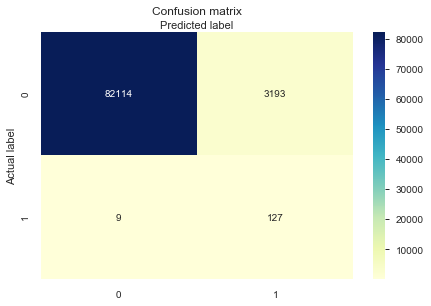

In [46]:
#Confusion Matrix
cnf_matrix=metrics.confusion_matrix(y_test, lr_Pred)
cnf_matrix

#Visualize confusion matrix using heat map

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.978


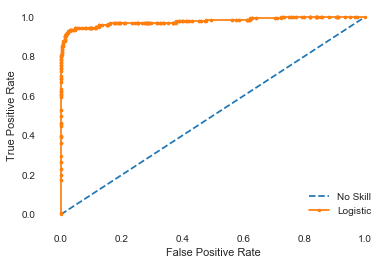

In [47]:
# useful for balanced data, included here for an example to use later

ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: f1=0.073 auc=0.486


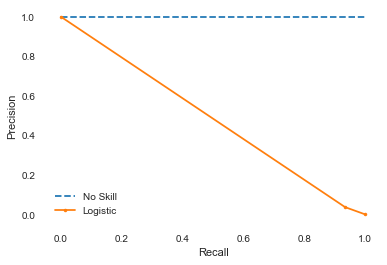

In [48]:
# useful for unbalanced data

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_Pred)
lr_f1, lr_auc = f1_score(y_test, lr_Pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [49]:
# Fit Random Forest Model

rf = RandomForestClassifier(n_estimators = 1000)

rf.fit(X_train, y_train)

rf_Pred=rf.predict(X_test)

#print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, rf_Pred))

c:\users\iowahawk89\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.93      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



Text(0.5, 257.44, 'Predicted label')

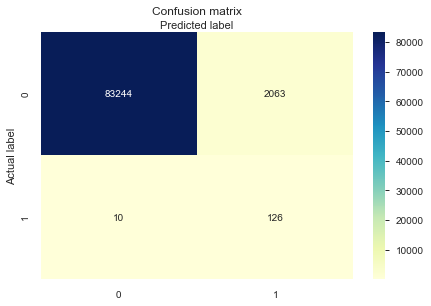

In [50]:
#Confusion Matrix
cnf_matrix=metrics.confusion_matrix(y_test, rf_Pred)
cnf_matrix
#Visualize confusion matrix using heat map

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

So far, logistic regression has better prediction capability, the RandomForestClassifier test has a lot more mistakes in the False Positive category, and only a few less mistakes in the False Negative category.

c:\users\iowahawk89\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1444: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  sample_weight = column_or_1d(sample_weight, warn=True)
c:\users\iowahawk89\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9830062146694287
AxesSubplot(0.125,0.125;0.775x0.755)
Accuracy score (training): 0.944
Accuracy score (validation): 0.983
Confusion Matrix:
false positive pct: 1.6865044532612383
tn  fp  fn  tp
83866 1441 11 125
[[83866  1441]
 [   11   125]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.08      0.92      0.15       136

    accuracy                           0.98     85443
   macro avg       0.54      0.95      0.57     85443
weighted avg       1.00      0.98      0.99     85443



Text(0.5, 257.44, 'Predicted label')

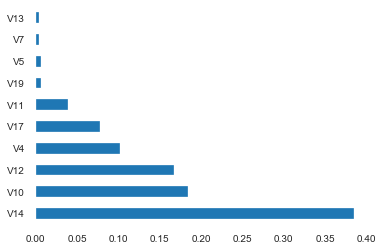

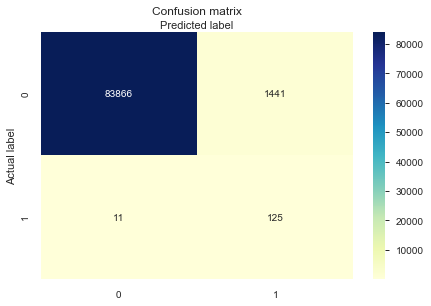

In [13]:
#setup model parameters, change some of the defaults based on benchmarking
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=10, 
                                    max_depth=3, random_state=0, subsample = 0.5, criterion='mse', 
                                    min_samples_split = 10, min_samples_leaf = 10)

#default fit model
#gb_clf.fit(X_train, y_train)

#since a false negative is much more likely than a false positive, we should weight them accordingly
gb_clf.fit( X_train, y_train, sample_weight=np.where(y_train == 1,0.5,1.0) )

#use model to predict validation dataset
predictions = gb_clf.predict(X_test)

print(gb_clf.score(X_test, y_test)) 
print(pd.Series(gb_clf.feature_importances_, index=X_train.columns[:]).nlargest(10).plot(kind='barh')) 
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train))) 
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test))) 
print("Confusion Matrix:")
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
total = tn+ fp+ fn+ tp 
print("false positive pct:",(fp/total)*100) 
print("tn", " fp", " fn", " tp") 
print(tn, fp, fn, tp) 
print(confusion_matrix(y_test, predictions)) 
print("Classification Report") 
print(classification_report(y_test, predictions))

cnf_matrix=metrics.confusion_matrix(y_test, predictions)
cnf_matrix

#Visualize confusion matrix using heat map cnf_matrix=metrics.confusion_matrix(y_test, predictions) cnf_matrix

class_names=[0,1] # name of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

After tweaking the parameters, i get a better result from GradientBoostingClassifier. Changing the weights has a very large influence on the number of errors (FN and FP). decreasing the true value vs the false value will decrease the FN, doing the opposite will decrease the FP. For example:  the sample_weight=np.where(y_train == 1,0.37,1.0) gives 13 FN and 795 FP. sample_weight=np.where(y_train == 1,0.1,1.0) gives 17 FN and 217 FP

my next step is to run 2 consecutive tests. 1st test should have low false negatives to catch (almost) all the actual positives, even if the number of false positives is high. Then only take these records with a predicted 1 value (should only be a few thousand), as the input for the next test. 2nd test should have low false positives to weed out the actual negatives.
Can also try the inverse, but think this option will have less chance of success.

1st step

c:\users\iowahawk89\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1444: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  sample_weight = column_or_1d(sample_weight, warn=True)
c:\users\iowahawk89\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8570508994300293
AxesSubplot(0.125,0.125;0.775x0.755)
Accuracy score (training): 0.944
Accuracy score (validation): 0.857
Confusion Matrix:
false positive pct: 14.286717460763315
tn1  fp  fn1  tp
73100 12207 7 129
[[73100 12207]
 [    7   129]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.86      0.92     85307
           1       0.01      0.95      0.02       136

    accuracy                           0.86     85443
   macro avg       0.51      0.90      0.47     85443
weighted avg       1.00      0.86      0.92     85443



c:\users\iowahawk89\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


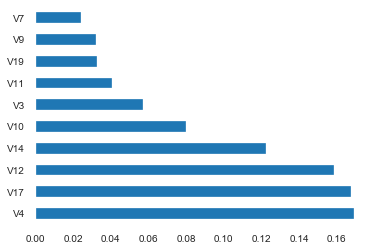

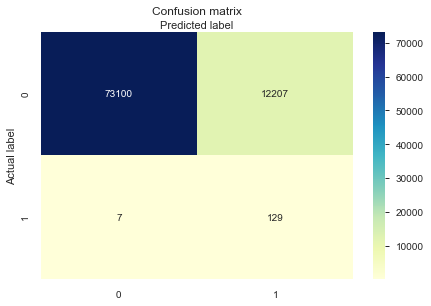

In [14]:
#setup model parameters, change some of the defaults based on benchmarking
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=5, 
                                    max_depth=3, random_state=0, subsample = 1.0, criterion='mse', 
                                    min_samples_split = 10, min_samples_leaf = 10)

#default fit model
#gb_clf.fit(X_train, y_train)

#since a false negative is much more likely than a false positive, we should weight them accordingly. 
#IE Finding a true one is more important
gb_clf.fit( X_train, y_train, sample_weight=np.where(y_train == 1,5.0,1.0) )

#use model to predict validation dataset
predictions = gb_clf.predict(X_test) 
print(gb_clf.score(X_test, y_test)) 
print(pd.Series(gb_clf.feature_importances_, index=X_train.columns[:]).nlargest(10).plot(kind='barh')) 
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train))) 
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test))) 
print("Confusion Matrix:")
tn1, fp, fn1, tp = confusion_matrix(y_test, predictions).ravel()
total = tn1+ fp+ fn1+ tp 
print("false positive pct:",(fp/total)*100) 
print("tn1", " fp", " fn1", " tp") 
print(tn1, fp, fn1, tp) 
print(confusion_matrix(y_test, predictions)) 
print("Classification Report") 
print(classification_report(y_test, predictions))

cnf_matrix=metrics.confusion_matrix(y_test, predictions)
cnf_matrix

#Visualize confusion matrix using heat map cnf_matrix=metrics.confusion_matrix(y_test, predictions) cnf_matrix

class_names=[0,1] # name of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

X_test['Prediction'] = predictions

In [15]:
X_test

,Time_Series,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Prediction
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180795,124702.0,-0.673320,1.823100,-2.152665,-1.051308,1.822568,1.319646,-0.228012,-1.743339,-0.665095,...,2.292603,-0.929823,0.561185,2.970343,-0.632171,0.095316,0.031770,0.093565,3.99,0
259979,159354.0,2.125553,-0.065046,-1.537467,0.125578,0.500319,-0.359530,0.124248,-0.201678,0.551045,...,-0.342157,-0.878330,0.281129,0.035931,-0.173013,0.207555,-0.075438,-0.060078,1.79,0
21885,31911.0,0.746800,-1.028053,1.127833,1.631418,-1.193487,0.946088,-0.857322,0.480905,1.662617,...,0.073226,0.058198,-0.235697,-0.457910,0.328226,-0.219767,0.058352,0.058441,195.60,0
217812,141043.0,2.080547,0.167780,-1.722107,0.403323,0.451991,-0.848388,0.190703,-0.239152,0.481197,...,-0.367406,-0.945073,0.332659,0.484916,-0.246959,0.174693,-0.061887,-0.030910,0.89,0


In [16]:
X_test['Prediction'] = predictions

c:\users\iowahawk89\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
yes_ind = X_test[X_test['Prediction'] == 1].index

In [20]:
X2_test = X_test.loc[yes_ind]
y2_test = y_test.loc[yes_ind]
X2_test = X2_test.drop(['Prediction'], axis=1)

c:\users\iowahawk89\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1444: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  sample_weight = column_or_1d(sample_weight, warn=True)
c:\users\iowahawk89\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9713035019455253
AxesSubplot(0.125,0.125;0.775x0.755)
Accuracy score (training): 0.917
Accuracy score (validation): 0.971
Confusion Matrix:
false positive pct: 2.7885862516212714
tn  fp  fn  tp
11863 344 10 119
[[11863   344]
 [   10   119]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     12207
           1       0.26      0.92      0.40       129

    accuracy                           0.97     12336
   macro avg       0.63      0.95      0.69     12336
weighted avg       0.99      0.97      0.98     12336

2 Step Final Confusion Matrix:
84963 344
17 119


Text(0.5, 257.44, 'Predicted label')

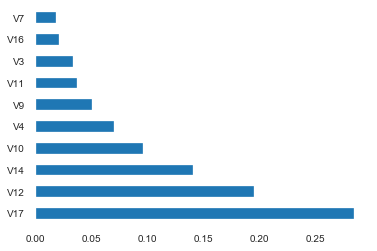

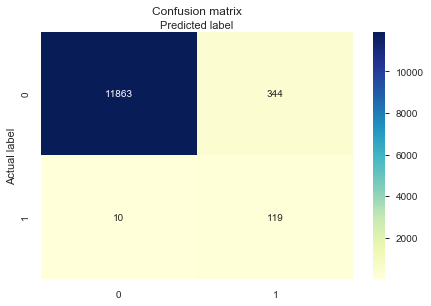

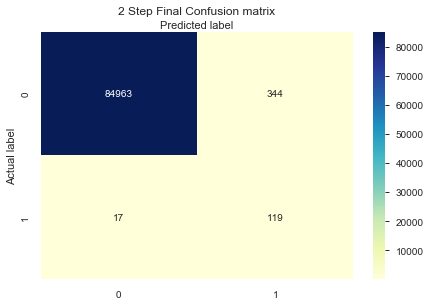

In [26]:
#setup model parameters, change some of the defaults based on benchmarking
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=5, 
                                    max_depth=3, random_state=0, subsample = 1.0, criterion='mse', 
                                    min_samples_split = 10, min_samples_leaf = 10)

#default fit model
#gb_clf.fit(X_train, y_train)

#since a false negative is much more likely than a false positive, we should weight them accordingly. 
#IE Finding a true one is more important
gb_clf.fit( X_train, y_train, sample_weight=np.where(y_train == 1,0.1,1.0) )

#use model to predict validation dataset
predictions = gb_clf.predict(X2_test) 
print(gb_clf.score(X2_test, y2_test)) 
print(pd.Series(gb_clf.feature_importances_, index=X_train.columns[:]).nlargest(10).plot(kind='barh')) 
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train))) 
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X2_test, y2_test))) 
print("Confusion Matrix:")
tn, fp, fn, tp = confusion_matrix(y2_test, predictions).ravel()
total = tn+ fp+ fn+ tp 
print("false positive pct:",(fp/total)*100) 
print("tn", " fp", " fn", " tp") 
print(tn, fp, fn, tp) 
print(confusion_matrix(y2_test, predictions)) 

print("Classification Report") 
print(classification_report(y2_test, predictions))

cnf_matrix=metrics.confusion_matrix(y2_test, predictions)
cnf_matrix

#Visualize confusion matrix using heat map cnf_matrix=metrics.confusion_matrix(y_test, predictions) cnf_matrix

class_names=[0,1] # name of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')


print("2 Step Final Confusion Matrix:")
print(tn+tn1, fp) 
print(fn+fn1, tp) 

fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame([[tn+tn1,fp],[fn+fn1,tp]]), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('2 Step Final Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

The 2 step process improves the overall model prediction by a large amount (361 incorrect predictions). I don't think we could get this high of precision and recall together with a single model. The best I could do with a single model was 1452 incorrect predictions.